# Stardist 2D

python 3.9.6

In [9]:
from stardist.models import StarDist2D
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt
# import imagej

## 1. Initialize

In [3]:
model = StarDist2D.from_pretrained('2D_paper_dsb2018')

Found model '2D_paper_dsb2018' for 'StarDist2D'.
Loading network weights from 'weights_last.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.417819, nms_thresh=0.5.


Text(0.5, 1.0, 'prediction + input overlay')

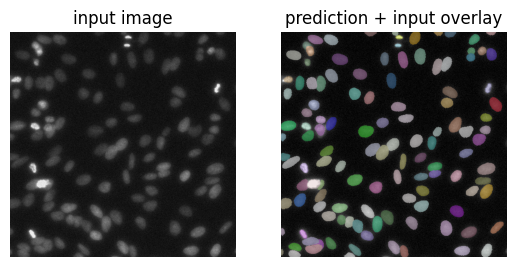

In [3]:
from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt

img = test_image_nuclei_2d()

labels, _ = model.predict_instances(normalize(img))

plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(labels, img=img))
plt.axis("off")
plt.title("prediction + input overlay")

In [13]:
def stardist_pred_show(img):
    labels, _ = model.predict_instances(normalize(img))

    plt.subplot(1,2,1)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.title("input image")

    plt.subplot(1,2,2)
    plt.imshow(render_label(labels, img=img))
    plt.axis("off")
    plt.title("prediction + input overlay")

    plt.show()

    return labels

def mask_label(labels):
    n_pred = np.unique(labels) -1
    masks = np.zeros((labels.shape[0], labels.shape[1], len(n_pred)-1))

    for pred in np.arange(len(n_pred)-1):
        masks[:,:,pred] = np.sign(labels*[labels == pred + 1])

    return masks

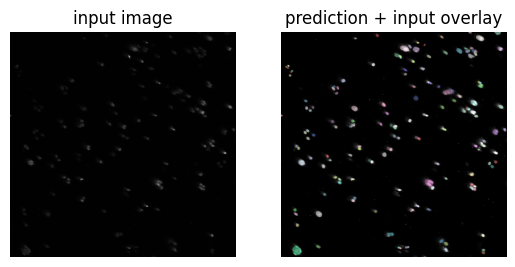

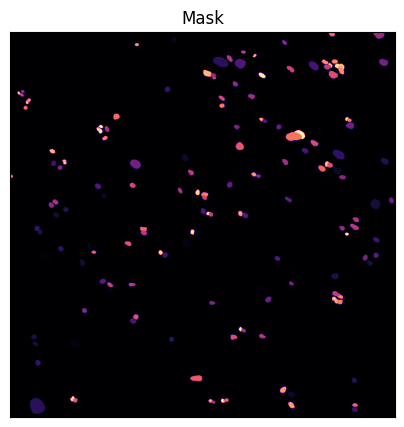

In [20]:
img = plt.imread("/Users/beatrizfernandes/PIC2/data/preprocessing_auto/layer 3/2d instance bio masks/image_011_nuclei2d/image/image_011_nuclei2d.png")
labels = stardist_pred_show(img)
path_auxiliary = '/Users/beatrizfernandes/Documents/Biomédica@IST/Mestrado/PIC2/auxiliary/'


plt.figure(figsize=(5,5))
plt.imshow(labels, cmap='magma')
plt.title('Mask')
plt.tick_params(left = False, bottom = False, labelbottom = False, labelleft=False)
plt.savefig(path_auxiliary + "stardist011.png", dpi = 600)
plt.show()

In [6]:
segmentation_2d_path = "/Users/beatrizfernandes/PIC2/tasks instantdl/nuclei2d_instance_segmentation/stardist/test/"
segmentation_2d_results_path = "/Users/beatrizfernandes/PIC2/tasks instantdl/nuclei2d_instance_segmentation/stardist/results/"
if not os.path.exists(segmentation_2d_results_path): os.makedirs(segmentation_2d_results_path)

In [17]:
for image_id in list(filter(lambda element: '.DS_Store' not in element, os.listdir(segmentation_2d_path))):
    image_path = "{0}{1}/image/{1}.png".format(segmentation_2d_path, image_id)
    img = plt.imread(image_path)
    # labels = stardist_pred_show(img)
    labels, _ = model.predict_instances(normalize(img))
    print("# of labels: {}".format(np.unique(labels).shape[0]-1))
    masks = mask_label(labels)
    print(image_id)
    np.save("{}{}.npy".format(segmentation_2d_results_path, image_id), masks, allow_pickle=True)


# of labels: 68
image_004_nuclei2d
# of labels: 75
image_005_nuclei2d
# of labels: 96
image_019_nuclei2d
# of labels: 85
image_018_nuclei2d
# of labels: 156
image_013_nuclei2d
# of labels: 108
image_012_nuclei2d
# of labels: 75
image_020_nuclei2d
# of labels: 90
image_021_nuclei2d
# of labels: 93
image_014_nuclei2d
# of labels: 141
image_015_nuclei2d
# of labels: 78
image_009_nuclei2d
# of labels: 91
image_008_nuclei2d
# of labels: 54
image_003_nuclei2d
# of labels: 127
image_002_nuclei2d
# of labels: 47
image_010_nuclei2d
# of labels: 159
image_011_nuclei2d
# of labels: 51
image_007_nuclei2d
# of labels: 71
image_006_nuclei2d
# of labels: 68
image_001_nuclei2d
# of labels: 91
image_017_nuclei2d
# of labels: 161
image_016_nuclei2d
